In [95]:
import geopandas as gpd
import rasterio
from pathlib import Path
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
from rasterio.crs import CRS
from shapely.geometry import Point

In [10]:
out = Path('out')

In [11]:
df = gpd.read_file(out / 'metadata.geojson')
df.head()

,opera_id,start_time,polarization,url,track_number,local_path,geometry
0,OPERA_L2_RTC-S1_T173-370320-IW3_20231229T13445...,2023-12-29 13:44:55+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202312...,"POLYGON ((-116.29247 33.60277, -117.18757 33.7..."
1,OPERA_L2_RTC-S1_T064-135514-IW3_20231222T01503...,2023-12-22 01:50:36+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,64,out/64/OPERA_L2_RTC-S1_T064-135514-IW3_2023122...,"POLYGON ((-116.81845 33.41076, -115.95567 33.5..."
2,OPERA_L2_RTC-S1_T173-370320-IW3_20231217T13445...,2023-12-17 13:44:56+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202312...,"POLYGON ((-116.29228 33.60241, -117.18737 33.7..."
3,OPERA_L2_RTC-S1_T064-135514-IW3_20231210T01503...,2023-12-10 01:50:38+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,64,out/64/OPERA_L2_RTC-S1_T064-135514-IW3_2023121...,"POLYGON ((-116.81776 33.41127, -115.95752 33.5..."
4,OPERA_L2_RTC-S1_T064-135514-IW3_20231210T01503...,2023-12-10 01:50:38+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,64,out/64/OPERA_L2_RTC-S1_T064-135514-IW3_2023121...,"POLYGON ((-116.81776 33.41127, -115.95752 33.5..."


In [45]:
track_number = 173 # 64 # 41 or 78

df_by_track = df[df.track_number == track_number].reset_index(drop=True)
df_by_track = df_by_track.sort_values(by='opera_id').reset_index(drop=True)
df_by_track

,opera_id,start_time,polarization,url,track_number,local_path,geometry
0,OPERA_L2_RTC-S1_T173-370320-IW3_20231006T13445...,2023-10-06 13:44:58+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202310...,"POLYGON ((-116.29126 33.60347, -116.34471 33.6..."
1,OPERA_L2_RTC-S1_T173-370320-IW3_20231006T13445...,2023-10-06 13:44:58+00:00,VV,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202310...,"POLYGON ((-116.29126 33.60347, -116.34471 33.6..."
2,OPERA_L2_RTC-S1_T173-370320-IW3_20231018T13445...,2023-10-18 13:44:58+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202310...,"POLYGON ((-116.29221 33.60361, -116.34566 33.6..."
3,OPERA_L2_RTC-S1_T173-370320-IW3_20231018T13445...,2023-10-18 13:44:58+00:00,VV,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202310...,"POLYGON ((-116.29221 33.60361, -116.34566 33.6..."
4,OPERA_L2_RTC-S1_T173-370320-IW3_20231111T13445...,2023-11-11 13:44:58+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202311...,"POLYGON ((-116.29114 33.60411, -117.18624 33.7..."
5,OPERA_L2_RTC-S1_T173-370320-IW3_20231111T13445...,2023-11-11 13:44:58+00:00,VV,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202311...,"POLYGON ((-116.29114 33.60411, -117.18624 33.7..."
6,OPERA_L2_RTC-S1_T173-370320-IW3_20231123T13445...,2023-11-23 13:44:57+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202311...,"POLYGON ((-116.29067 33.60239, -117.18574 33.7..."
7,OPERA_L2_RTC-S1_T173-370320-IW3_20231123T13445...,2023-11-23 13:44:57+00:00,VV,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202311...,"POLYGON ((-116.29067 33.60239, -117.18574 33.7..."
8,OPERA_L2_RTC-S1_T173-370320-IW3_20231205T13445...,2023-12-05 13:44:57+00:00,VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202312...,"POLYGON ((-116.29194 33.60217, -117.18701 33.7..."
9,OPERA_L2_RTC-S1_T173-370320-IW3_20231205T13445...,2023-12-05 13:44:57+00:00,VV,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,173,out/173/OPERA_L2_RTC-S1_T173-370320-IW3_202312...,"POLYGON ((-116.29194 33.60217, -117.18701 33.7..."


In [46]:
def normalize_band(band_image, min_percentile=2, max_percentile=98):
    # Source: https://github.com/opera-adt/RTC/blob/70d42164a5ebff07165f551c619b3e3da2a5e51d/src/rtc/rtc_s1_single_job.py#L269C1-L298C1
    vmin = np.nanpercentile(band_image, min_percentile)
    vmax = np.nanpercentile(band_image, max_percentile)
    
    band_out = band_image.copy()
    ind_lower = band_image < vmin
    valid_data_ind = band_image > vmin
    normalize_ratio = (band_out[valid_data_ind] - vmin) / (vmax - vmin)
    band_out[valid_data_ind] = np.sqrt(normalize_ratio)
    band_out[ind_lower] = 0
    band_out = np.clip(band_out, 0, 1)
    return band_out


In [72]:
def open_one(path):
    print(path)
    with rasterio.open(path) as ds:
        p = ds.profile
        X = ds.read(1)
    X = normalize_band(X)
    return X, p

arrays_vv, profiles_vv = zip(*list(map(open_one, df_by_track[df_by_track.polarization == 'VV'].local_path)))
arrays_vh, profiles_vh = zip(*list(map(open_one, df_by_track[df_by_track.polarization == 'VH'].local_path)))

factor = 5
arrays_ra = [normalize_band(vv / (vh + 1e-7)) for (vv, vh) in zip(arrays_vv, arrays_vh)]



mask = np.isnan(arrays_vh[0])

out/173/OPERA_L2_RTC-S1_T173-370320-IW3_20231006T134458Z_20231007T122425Z_S1A_30_v1.0/OPERA_L2_RTC-S1_T173-370320-IW3_20231006T134458Z_20231007T122425Z_S1A_30_v1.0_VV.tif
out/173/OPERA_L2_RTC-S1_T173-370320-IW3_20231018T134458Z_20231019T044705Z_S1A_30_v1.0/OPERA_L2_RTC-S1_T173-370320-IW3_20231018T134458Z_20231019T044705Z_S1A_30_v1.0_VV.tif
out/173/OPERA_L2_RTC-S1_T173-370320-IW3_20231111T134458Z_20231116T013036Z_S1A_30_v1.0/OPERA_L2_RTC-S1_T173-370320-IW3_20231111T134458Z_20231116T013036Z_S1A_30_v1.0_VV.tif
out/173/OPERA_L2_RTC-S1_T173-370320-IW3_20231123T134457Z_20231206T032347Z_S1A_30_v1.0/OPERA_L2_RTC-S1_T173-370320-IW3_20231123T134457Z_20231206T032347Z_S1A_30_v1.0_VV.tif
out/173/OPERA_L2_RTC-S1_T173-370320-IW3_20231205T134457Z_20231205T203151Z_S1A_30_v1.0/OPERA_L2_RTC-S1_T173-370320-IW3_20231205T134457Z_20231205T203151Z_S1A_30_v1.0_VV.tif
out/173/OPERA_L2_RTC-S1_T173-370320-IW3_20231217T134456Z_20231221T165415Z_S1A_30_v1.0/OPERA_L2_RTC-S1_T173-370320-IW3_20231217T134456Z_20231221T1

Ref: https://ceos.org/ard/files/Laymans_SAR_Interpretation_Guide_3.0.pdf

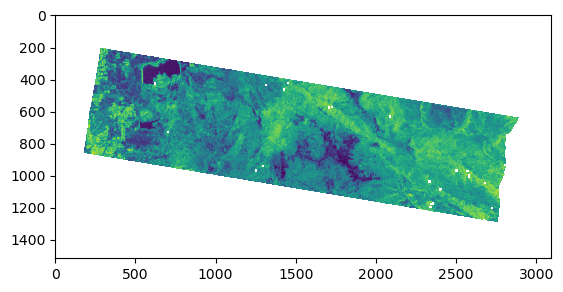

In [53]:
plt.imshow(rgb[0, ...])

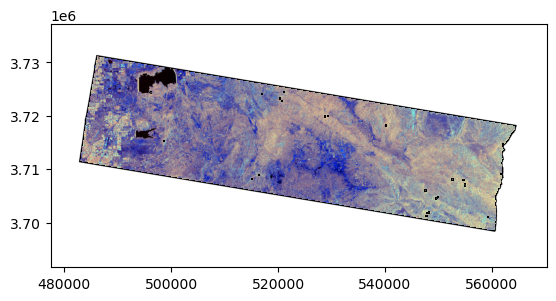

<Axes: >

In [112]:
ind = 0

rgb_0 = np.stack([arrays_vh[ind],
                arrays_vv[ind],
                arrays_ra[ind],
                1-mask], axis=0)
show(rgb_0, transform=profiles_vv[0]['transform'])

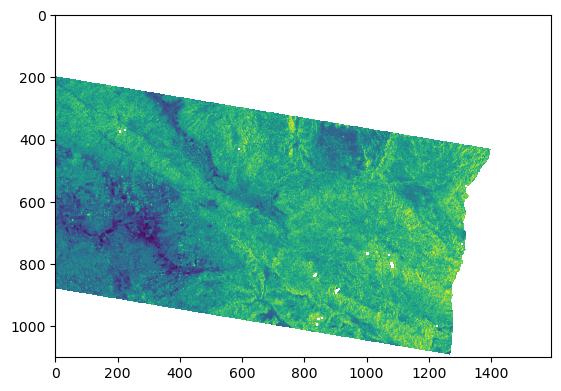

In [113]:
sy = np.s_[200:1300]
sx = np.s_[1_500:]
plt.imshow(rgb_0.transpose([1, 2, 0])[sy, sx, 1])

/Users/cmarshak/mambaforge/envs/opera-change/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


<Axes: >

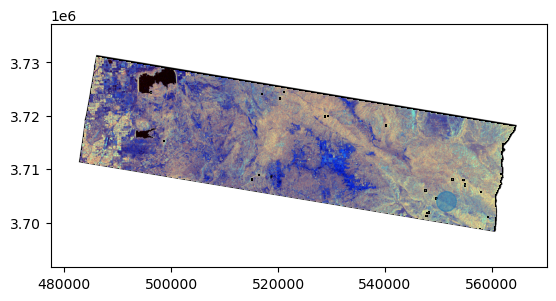

In [116]:
ind = -2
pt = [-116.4461721, 33.4740632]

fig, ax = plt.subplots()

df_pt = gpd.GeoDataFrame(geometry=[Point(*pt)], crs=CRS.from_epsg(4326)).to_crs(profiles_vh[0]['crs'])

rgb_1 = np.stack([arrays_vh[ind],
                arrays_vv[ind],
                arrays_ra[ind],
                1-mask], axis=0)
show(rgb_1, transform=profiles_vv[0]['transform'], ax=ax)
df_pt.plot(ax=ax, markersize=200, alpha=.5)

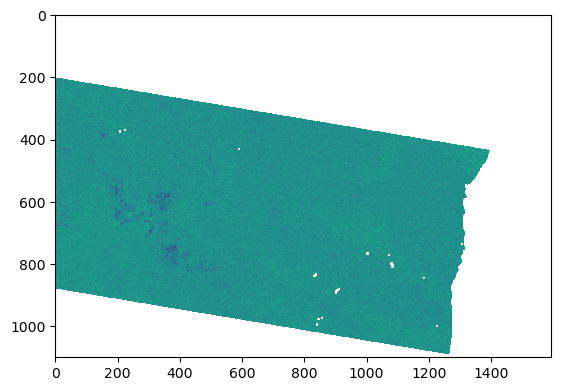

In [117]:

plt.imshow(rgb_1.transpose([1, 2, 0])[sy, sx, 0] - rgb_0.transpose([1, 2, 0])[sy, sx, 0])